# <center> Risk Analysis on stock investment using Neural Networks <br> and Price Forecasting 

## Group

- Dhanraj S    -  922520205021
- Dhinesh S     - 922520205023
- Karunakaran C  -922520205047
- Kavidharsan B  -922520205048

## 1. Import required packages and Download the Dataset from Yahoo Finance

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
yf.pdr_override()

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


tech_list = ['AAPL', 'GOOG', 'MSFT', 'TSLA','AMZN','BABA']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
company_list = [AAPL, GOOG, MSFT, TSLA, AMZN, BABA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "TESLA","AMAZON","ALIBABA"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
df.tail(100)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-09,111.989998,113.110001,108.120003,110.830002,110.830002,42085300,ALIBABA
2023-01-10,112.970001,115.480003,111.209999,114.879997,114.879997,33478600,ALIBABA
2023-01-11,114.599998,115.209999,112.309998,115.019997,115.019997,22804400,ALIBABA
2023-01-12,113.660004,113.790001,111.449997,113.150002,113.150002,16590600,ALIBABA
2023-01-13,114.519997,117.980003,114.089996,117.010002,117.010002,25615100,ALIBABA
...,...,...,...,...,...,...,...
2023-05-25,80.589996,80.709999,78.120003,78.779999,78.779999,21811600,ALIBABA
2023-05-26,79.900002,81.566002,78.400002,80.970001,80.970001,16399200,ALIBABA
2023-05-30,80.120003,80.699997,78.169998,78.669998,78.669998,21209600,ALIBABA


In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,105.630986,106.918365,104.429157,105.734889,104.448381,1.111409e+08
std,45.708406,46.286886,45.160201,45.750718,46.087172,5.430101e+07
min,35.994999,36.430000,35.500000,35.547501,34.257286,3.519590e+07
25%,55.000000,55.598125,54.318126,54.983124,53.111753,7.569580e+07
50%,119.545002,120.980000,117.935001,119.325001,117.729813,9.603590e+07
75%,147.045002,148.802505,145.637501,147.054996,146.391777,1.297685e+08
max,182.630005,182.940002,179.119995,182.009995,180.683884,4.265100e+08


In [9]:
BABA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,92.258778,93.916488,90.403682,92.144861,92.144861,2.430903e+07
std,13.567523,13.751426,13.226076,13.574963,13.574963,1.424702e+07
min,63.200001,64.099998,58.009998,63.150002,63.150002,7.807100e+06
25%,82.965000,84.415001,82.022499,82.957499,82.957499,1.661832e+07
50%,90.260002,91.764999,88.459999,89.989998,89.989998,2.028775e+07
75%,102.247498,104.465000,99.710001,102.195000,102.195000,2.685225e+07
max,122.260002,125.839996,120.699997,122.389999,122.389999,1.188752e+08


In [10]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,210.305463,215.200846,205.120489,210.190053,210.190053,1.167268e+08
std,51.041521,51.780263,50.311374,50.939408,50.939408,4.852694e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.902500,182.459999,172.507496,178.762501,178.762501,7.960010e+07
50%,198.919998,203.474998,193.599998,197.684998,197.684998,1.040462e+08
75%,244.205830,248.338329,236.287502,240.612495,240.612495,1.468014e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


In [11]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,261.652699,264.805516,258.788214,261.972659,260.539031,2.888360e+07
std,24.705021,24.552729,24.901911,24.921245,25.159549,1.024186e+07
min,217.550003,220.410004,213.429993,214.250000,212.649246,9.200800e+06
25%,243.200005,245.307499,240.342499,242.402496,240.916103,2.248418e+07
50%,256.899994,259.985001,253.345001,256.600006,254.316704,2.669530e+07
75%,277.730011,281.080002,275.377495,277.682503,275.700386,3.198870e+07
max,335.230011,335.940002,330.519989,332.890015,332.890015,8.610200e+07


In [12]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,107.971349,109.770492,106.182317,108.023680,108.023680,6.923750e+07
std,14.958907,15.180754,14.851826,15.003786,15.003786,2.622691e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.386340e+07
25%,96.077501,97.642498,94.232498,96.289999,96.289999,5.298012e+07
50%,104.690002,106.389999,103.244999,105.065002,105.065002,6.315025e+07
75%,117.117496,119.049997,115.189997,117.484999,117.484999,7.559728e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08


In [13]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,103.870154,105.441369,102.658139,104.078669,104.078669,2.783606e+07
std,9.989480,10.144685,10.002666,10.129391,10.129391,1.085588e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.769999,97.355000,94.500000,95.844999,95.844999,2.160130e+07
50%,102.924999,104.459999,102.035000,103.739998,103.739998,2.526950e+07
75%,111.654999,113.500252,109.857498,111.906252,111.906252,3.139138e+07
max,126.290001,127.050003,123.449997,125.870003,125.870003,9.779860e+07


## Information About the Data

In [14]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-06-01 to 2023-06-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [15]:
# General info
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-06-01 to 2023-06-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [16]:
# General info
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-06-01 to 2023-06-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [17]:
# General info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-06-01 to 2023-06-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [18]:
# General info
BABA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-06-01 to 2023-06-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [19]:
# General info
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-06-01 to 2023-06-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

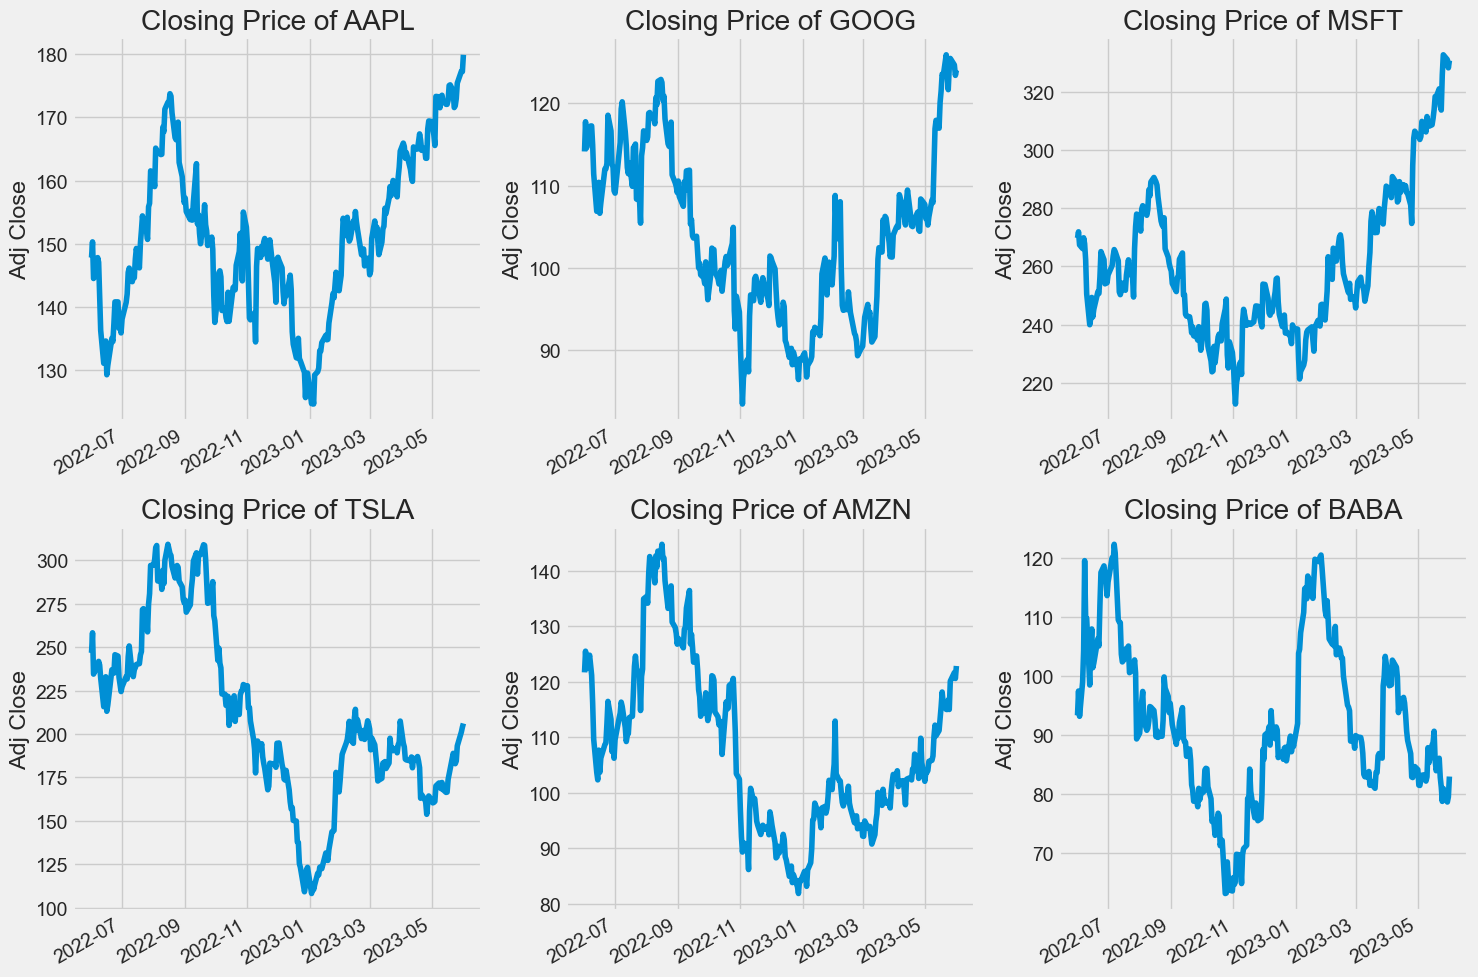

In [23]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

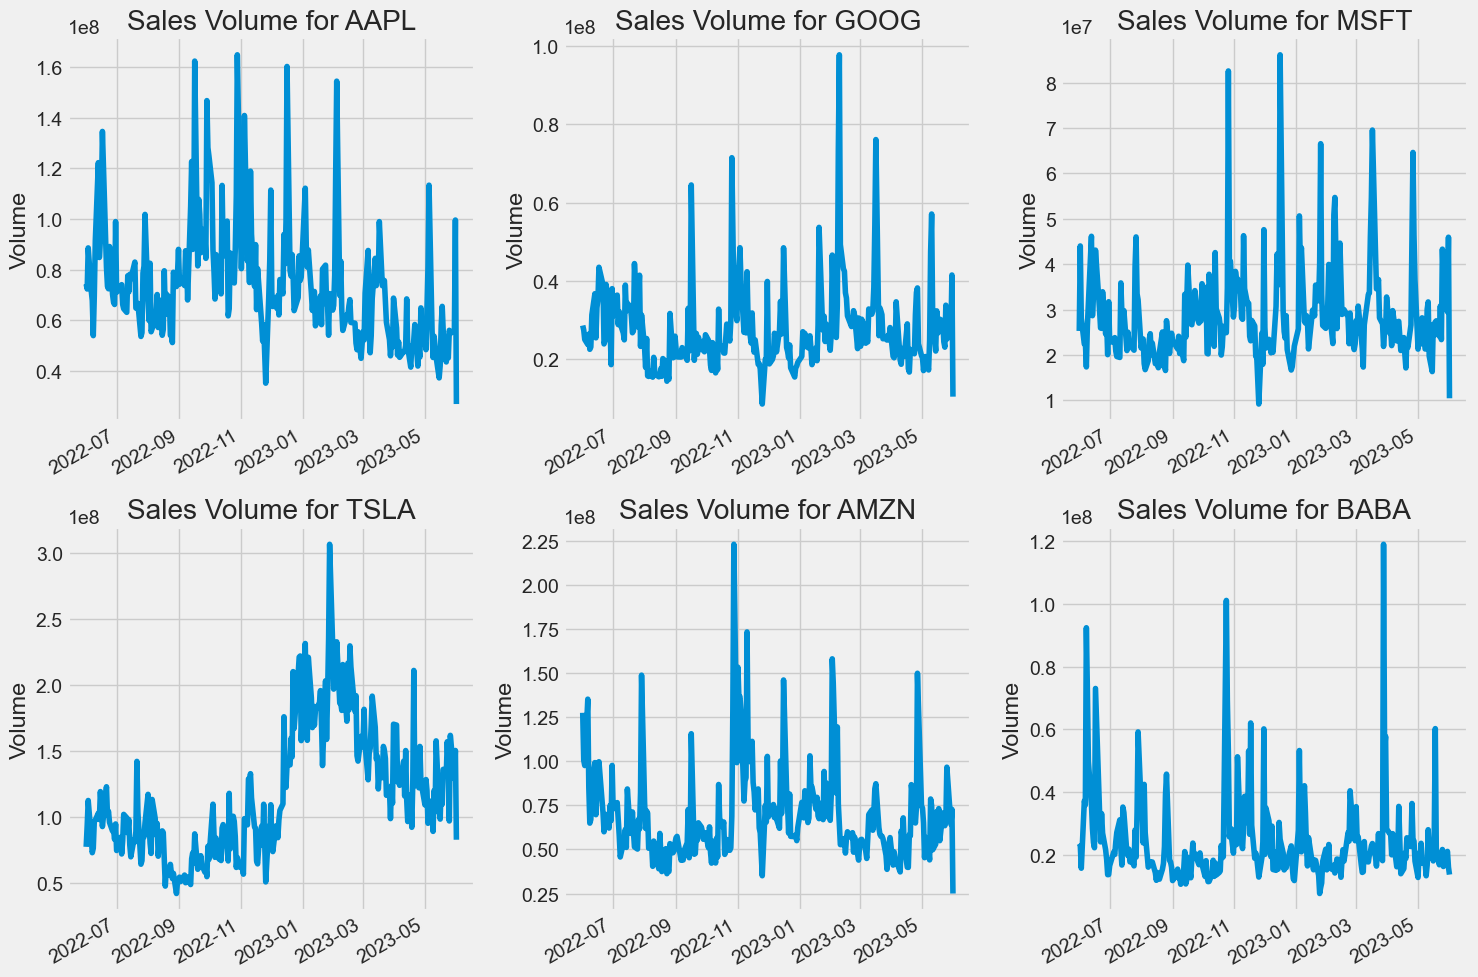

In [24]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

## 2. Moving average of the various stocks

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

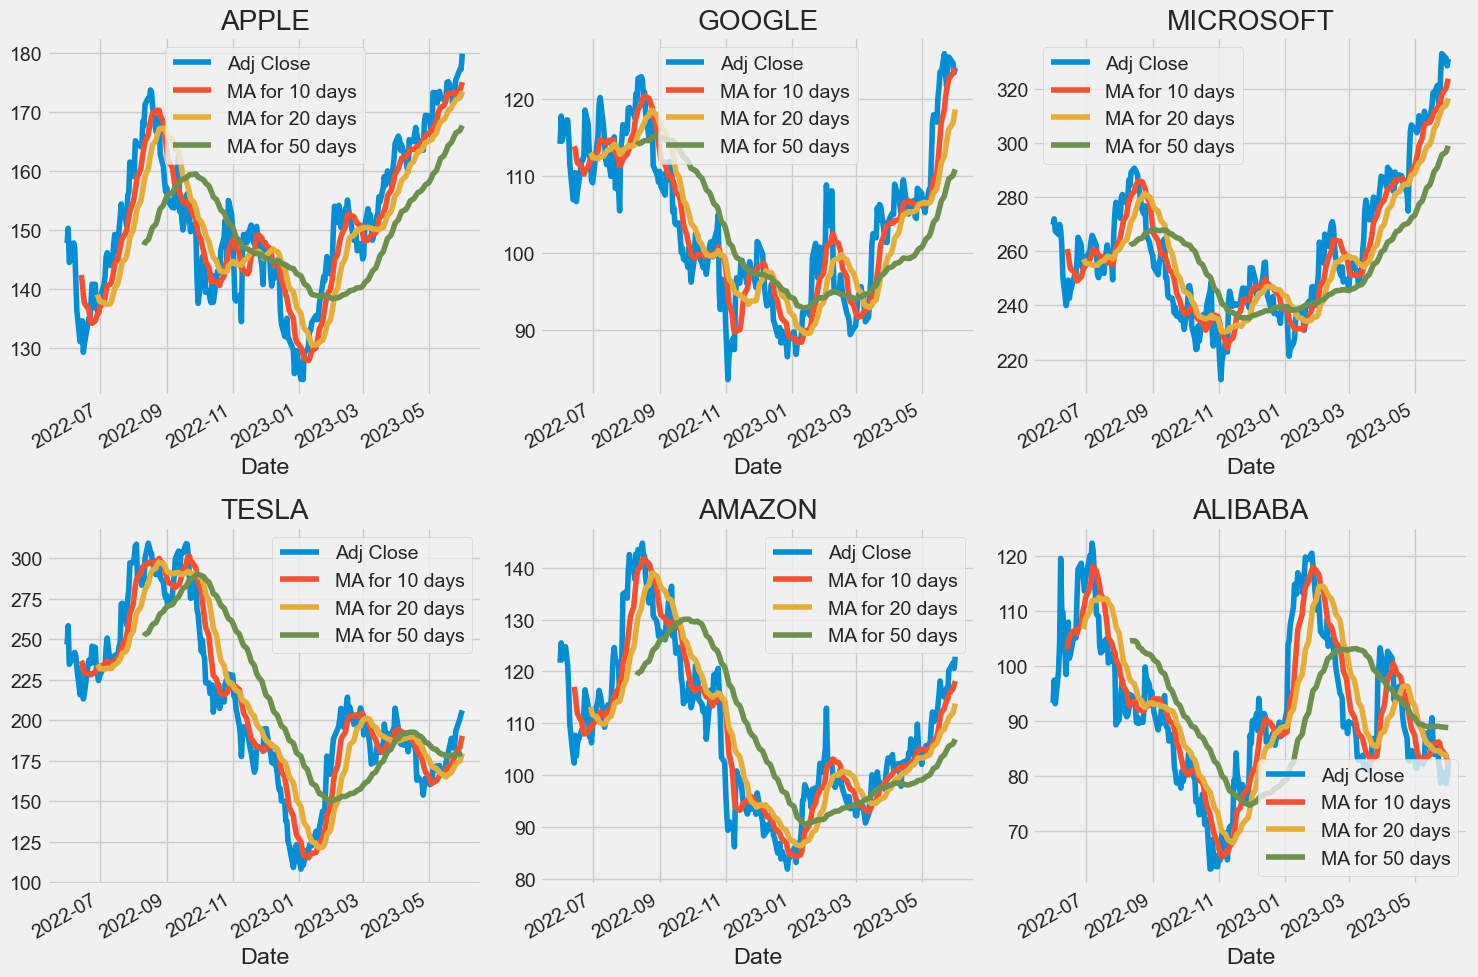

In [25]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('MICROSOFT')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

BABA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('ALIBABA')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. Daily return of the stock on average

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

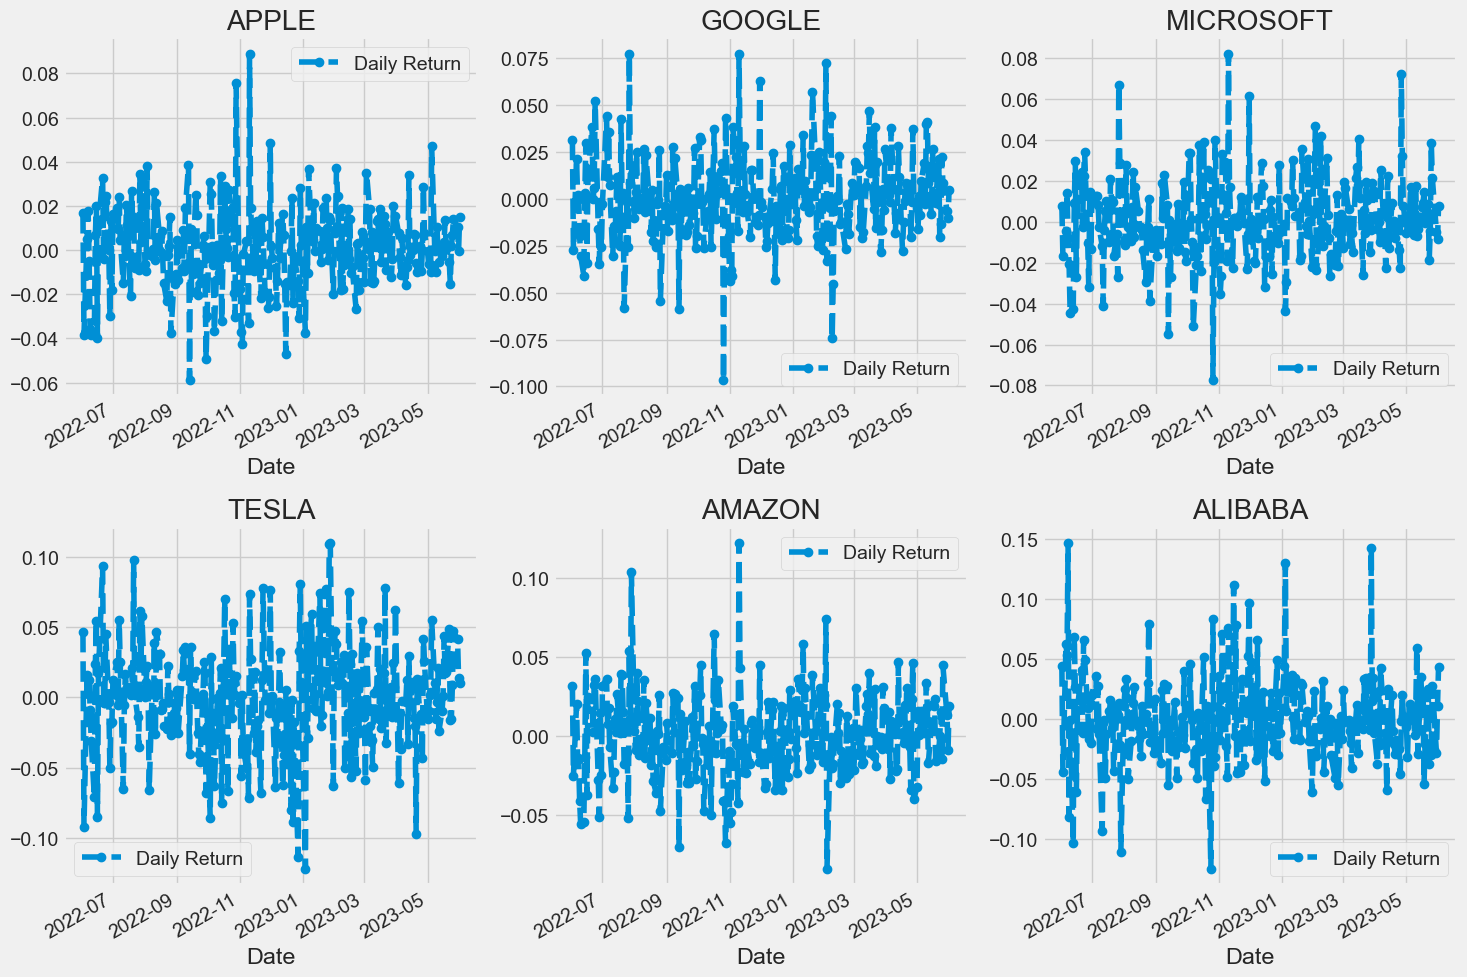

In [26]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title('MICROSOFT')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('TESLA')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

BABA['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title('ALIBABA')

fig.tight_layout()

Now let's get an overall look at the average daily return using a histogram.

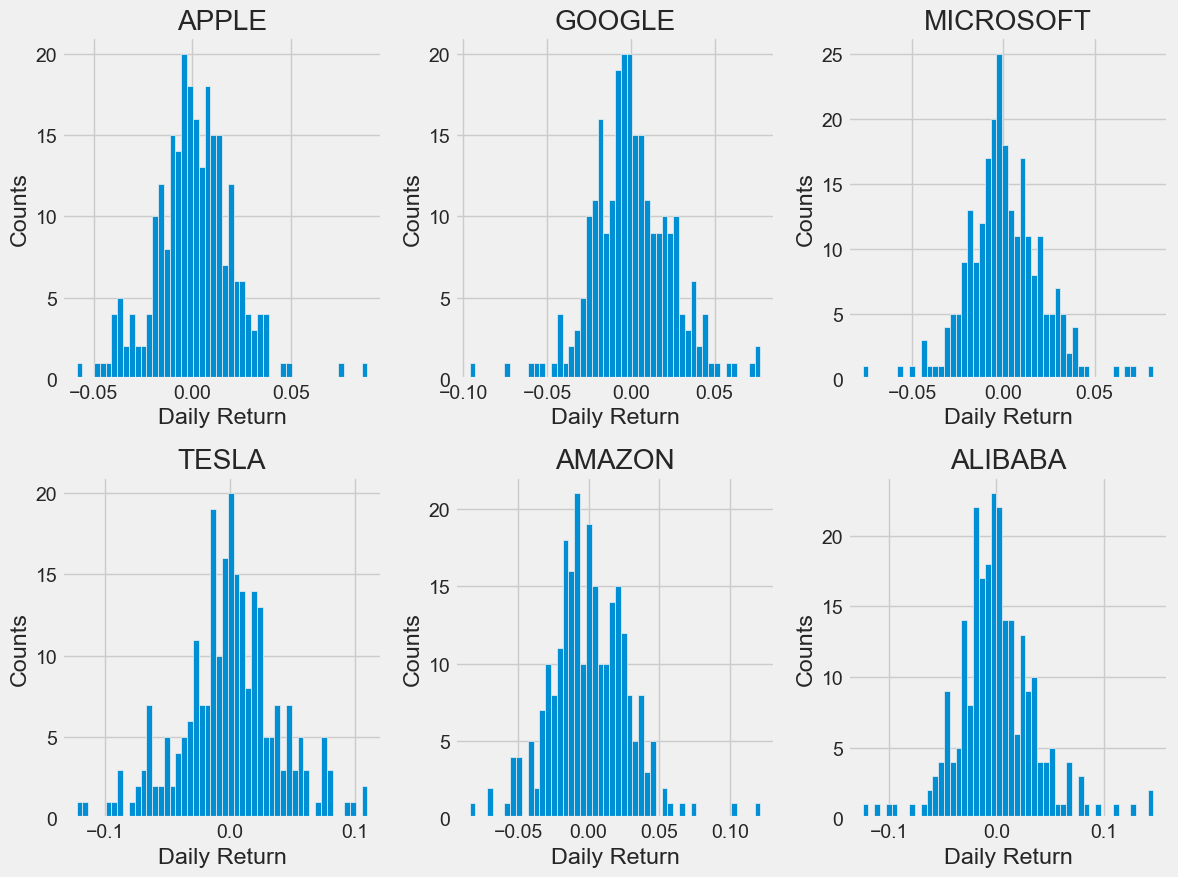

In [27]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. Correlation between different stocks closing prices

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [37]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,BABA,GOOG,MSFT,TSLA
Date,,,,,,
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02,0.016811,0.031450,0.044121,0.031620,0.007929,0.046774
2022-06-03,-0.038556,-0.025185,-0.044000,-0.027024,-0.016607,-0.092194
2022-06-06,0.005228,0.019943,0.062225,0.021355,-0.004703,0.016047
2022-06-07,0.017586,-0.014344,0.053631,0.001872,0.013954,0.002546


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

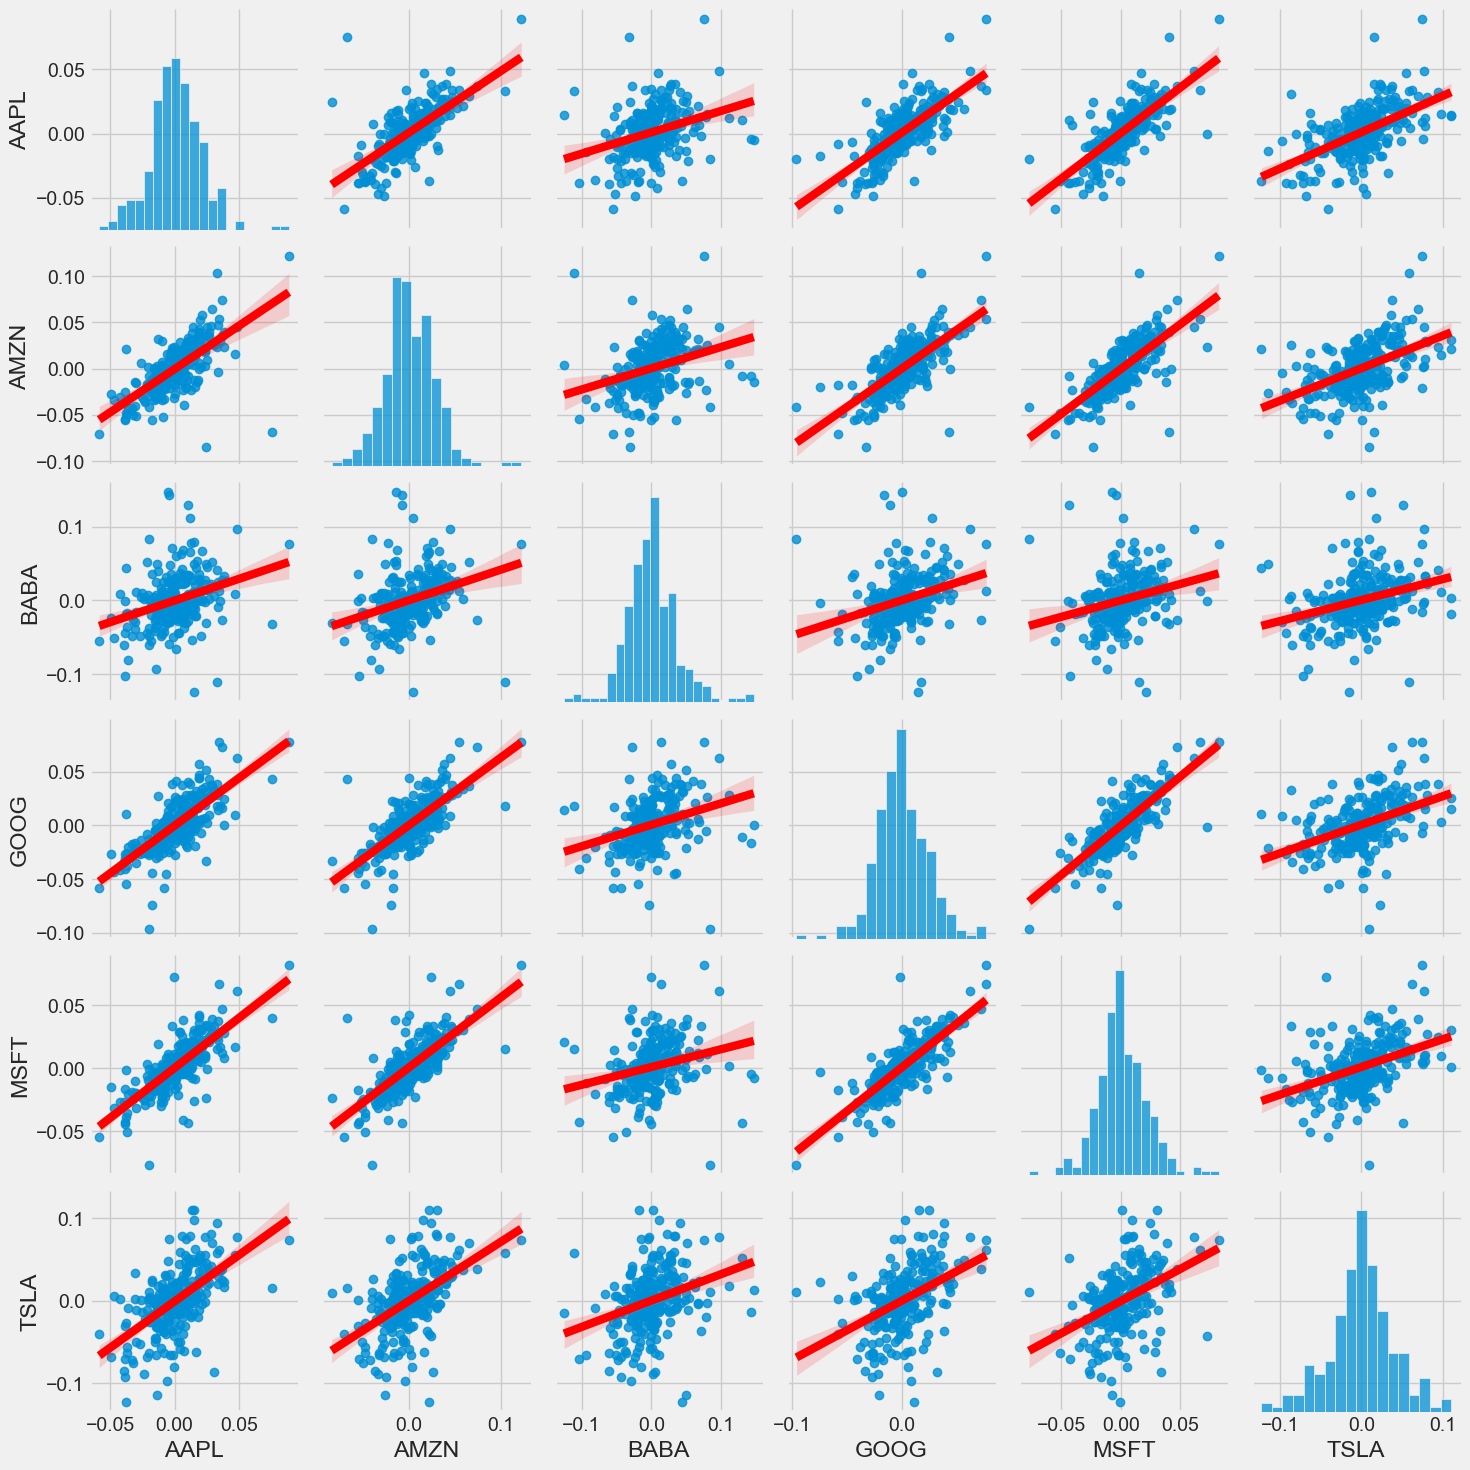

In [38]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(tech_rets, kind='reg',plot_kws={'line_kws':{'color':'red'}})

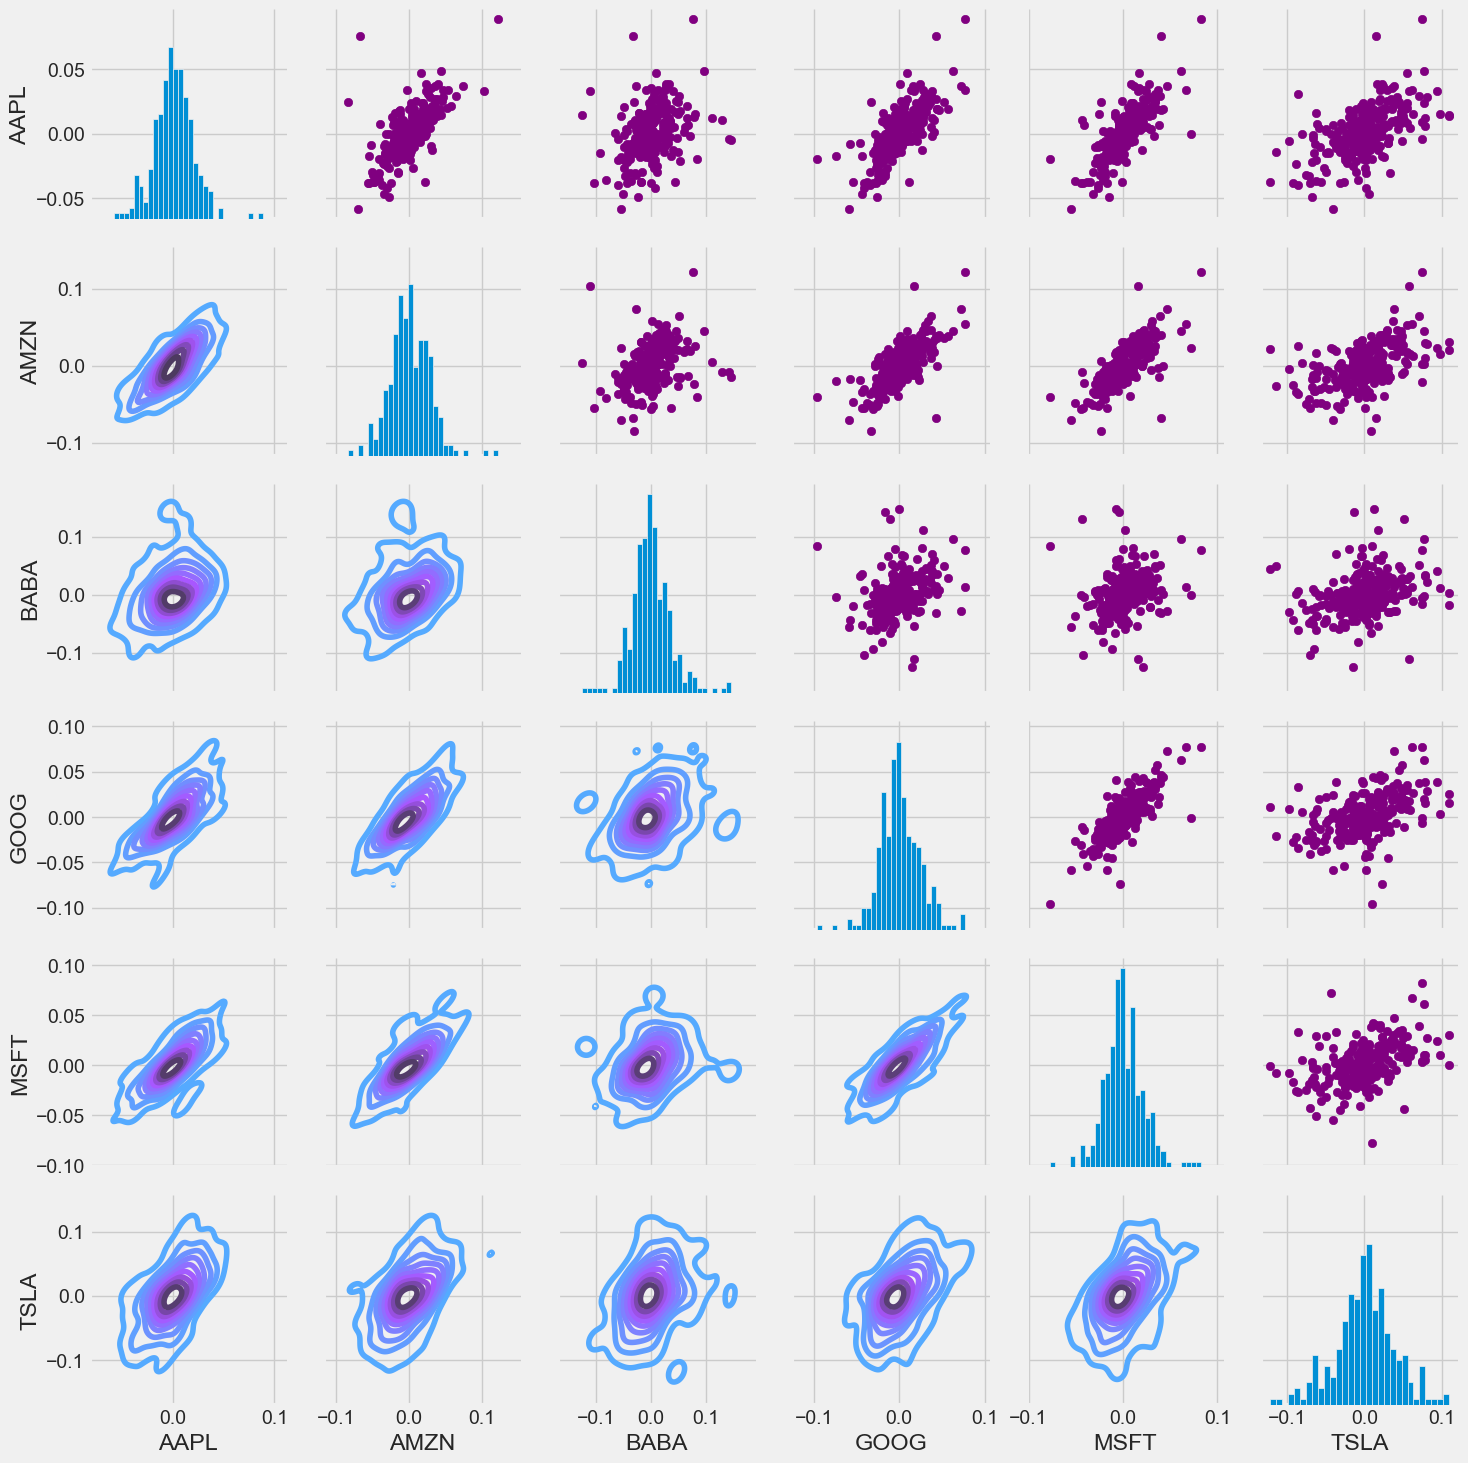

In [40]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

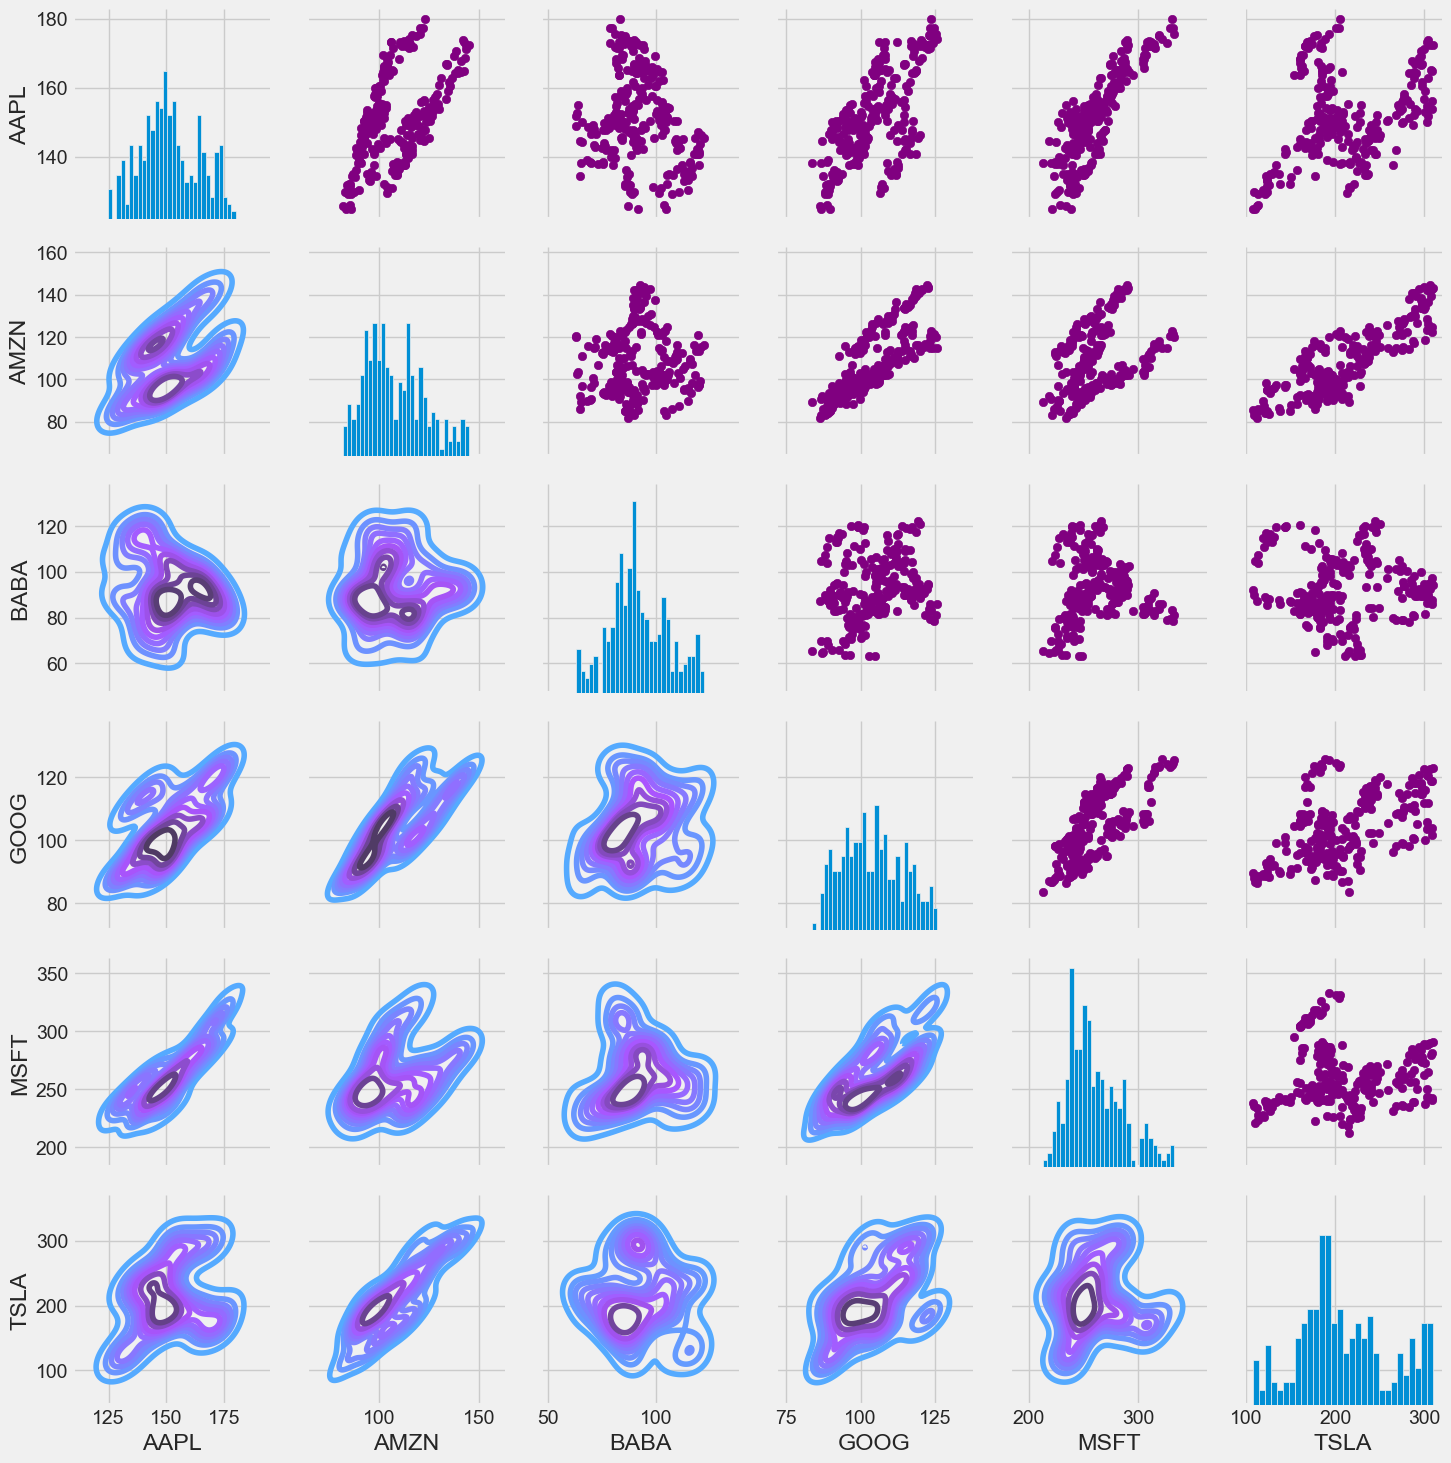

In [39]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

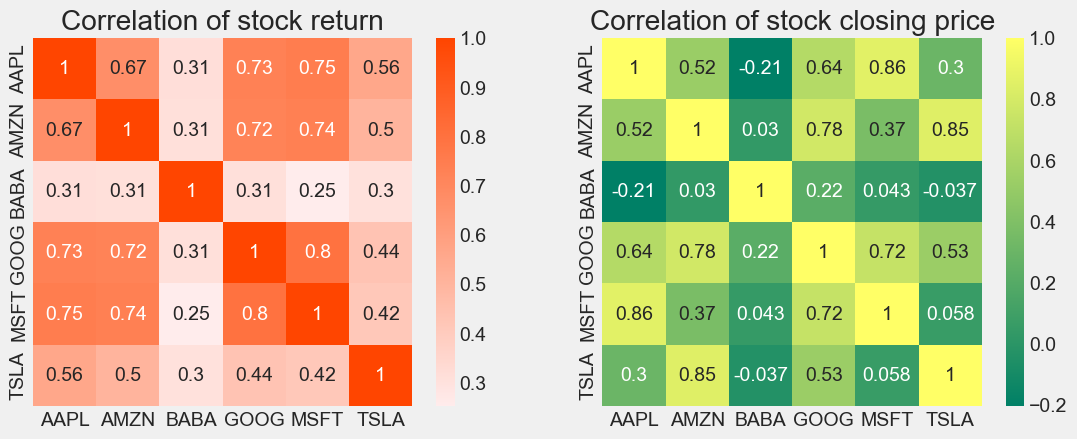

In [41]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
from matplotlib.colors import LinearSegmentedColormap
orangered_cmap = LinearSegmentedColormap.from_list('orangered', ['#FFECEC','orangered'])
sns.heatmap(tech_rets.corr(), annot=True, cmap=orangered_cmap)
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. Analysing about the risk on the Market on the Particular Day

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

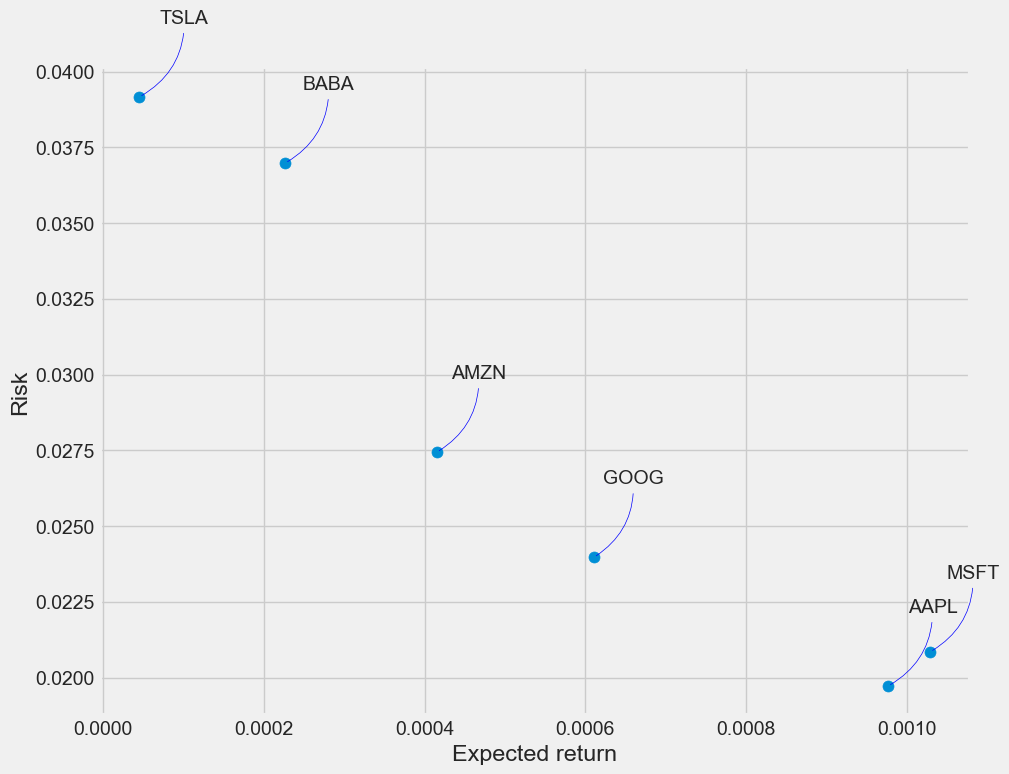

In [42]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [43]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482925,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550009,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821993,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801655,394024400
...,...,...,...,...,...,...
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.990005,56058300
2023-05-26,173.320007,175.770004,173.110001,175.429993,175.429993,54794100
2023-05-30,176.960007,178.990005,176.570007,177.300003,177.300003,55964400


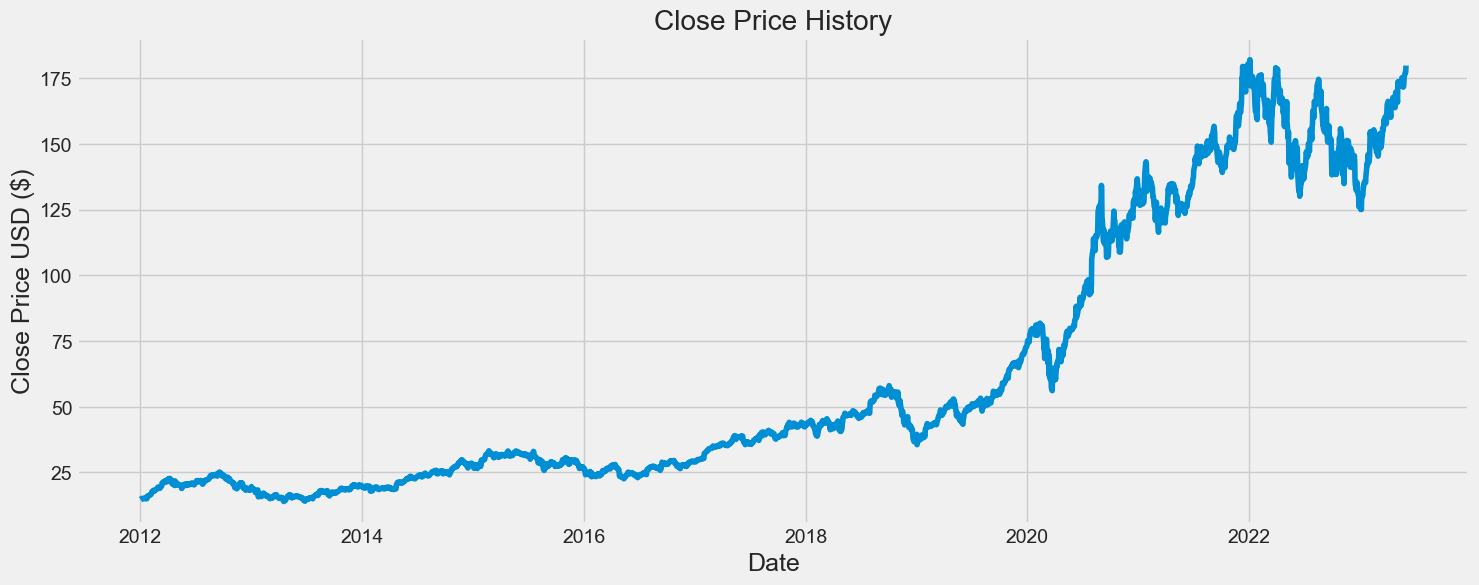

In [44]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [45]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2729

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.92663442],
       [0.92609893],
       [0.92282632]])

In [47]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2669/2669 [==============================] - 51s 18ms/step - loss: 0.0022 - precision: 1.0000 - recall: 0.2118


In [50]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("root mean square :")
print(rmse)

5/5 [==============================] - 1s 24ms/step
root mean square :
4.029697100916308


In [51]:

acc1 = np.mean(y_test)
acc2 = np.mean(predictions)
print("Accuracy :")
print((acc1/acc2)*100)

Accuracy :
99.61337951123247


C:\Users\sakthi\AppData\Local\Temp\ipykernel_22208\2954574911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


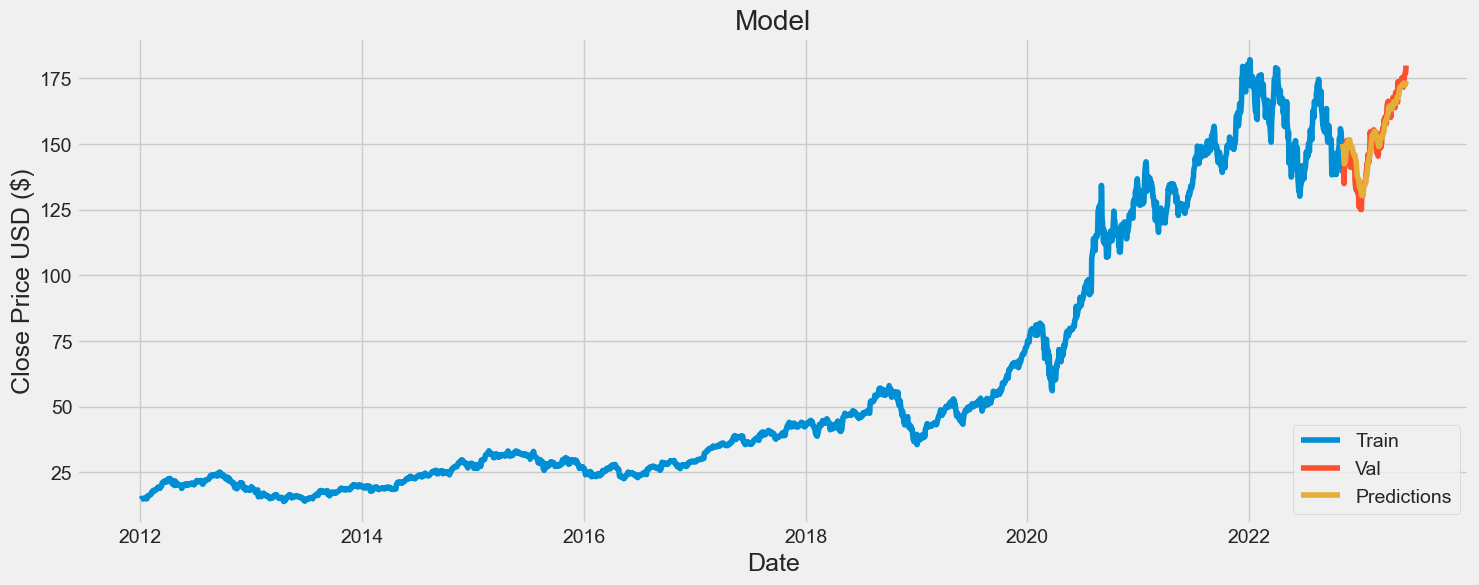

In [52]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualization
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [53]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-11-04,138.380005,149.956650
2022-11-07,138.919998,147.669357
2022-11-08,139.500000,145.629837
2022-11-09,134.869995,144.103409
2022-11-10,146.869995,142.382080
...,...,...
2023-05-25,172.990005,172.485718
2023-05-26,175.429993,172.310486
2023-05-30,177.300003,172.570938


# Summary

- load stock market data from the YAHOO Finance website using yfinance.
- explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- the correlation between stocks.
- How to measure the risk of investing in a particular stock.